# Import the data

In [27]:
import pandas as pd 
import numpy as np

df_raw_train = pd.read_csv("/kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_train.csv")
df_raw_test = pd.read_csv("/kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_test.csv")

In [28]:
df_raw_train = df_raw_train
df_raw_test = df_raw_test

# Visualize few trajectories

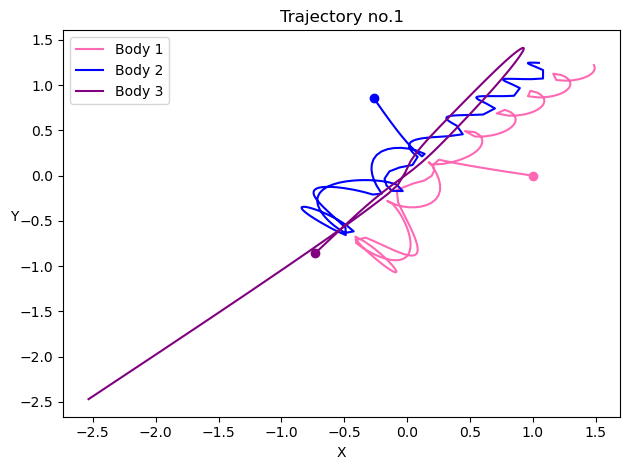

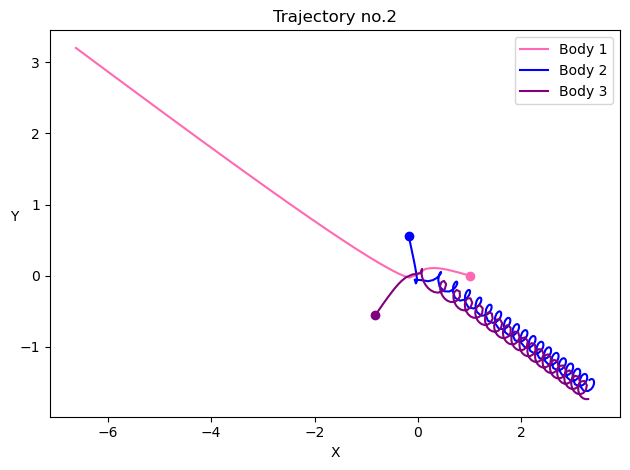

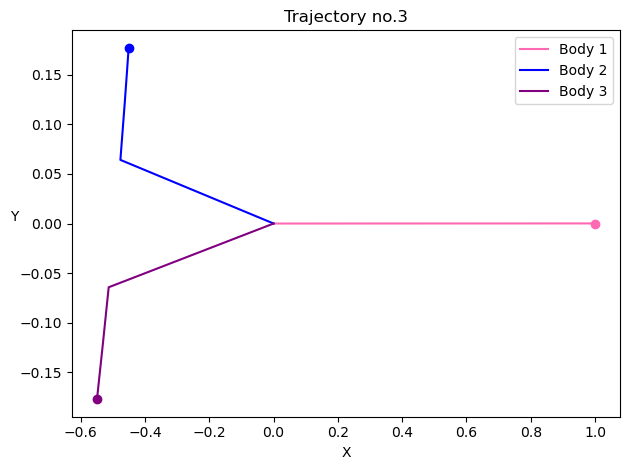

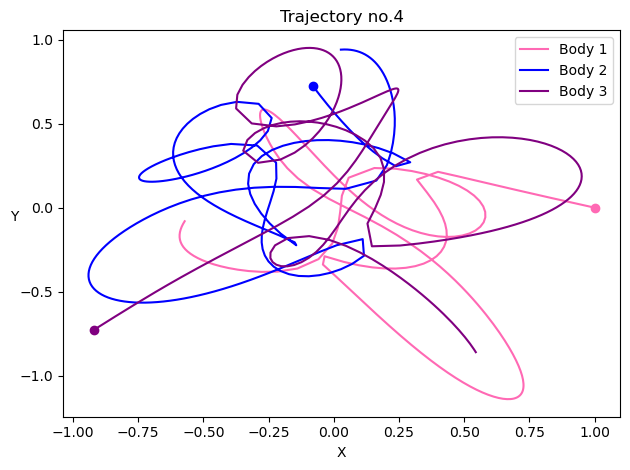

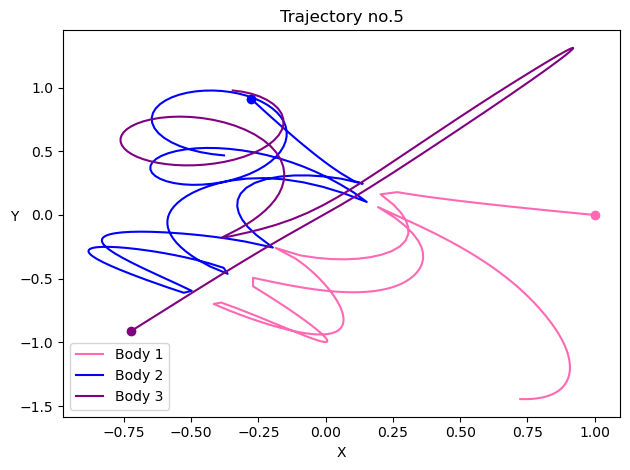

In [29]:
import matplotlib.pyplot as plt

start = 0
end = 257

for i in range(5):
    trajectory = df_raw_train[start:end]
    x1, y1, x2, y2, x3, y3 = trajectory.x_1, trajectory.y_1, trajectory.x_2, trajectory.y_2, trajectory.x_3, trajectory.y_3
    plt.plot(x1, y1, color="hotpink", label = "Body 1")
    plt.plot(x2, y2, color="blue", label = "Body 2")
    plt.plot(x3, y3, color="purple", label = "Body 3")
    plt.scatter(x1[start], y1[start], color="hotpink")
    plt.scatter(x2[start], y2[start], color="blue")
    plt.scatter(x3[start], y3[start], color="purple")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.title("Trajectory no." + str(i+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

    start += 257
    end += 257


# Prepare the dataset

In [30]:
df_raw_train["group"] = df_raw_train["Id"]//257

In [31]:
#All starting positions
df_init = df_raw_train[ df_raw_train.index%257 == 0]

In [32]:
df_combined = df_raw_train.merge(df_init, on="group",  suffixes=('', '_init'))

# Step 1: Create a list/array of unique group_ids
unique_groups = df_combined['Id_init'].unique()

# Step 2: Create a random mask for this list
mask_train_test = np.random.rand(len(unique_groups)) < 0.8  # random True/False values

# Step 3: Split unique groups into two sets
group_train = unique_groups[mask_train_test]  # groups for the training set
group_testing = unique_groups[~mask_train_test]  # groups for the test set

# Step 4: Use the mask to split the DataFrame
train_set = df_combined[df_combined['Id_init'].isin(group_train)]
testing_set = df_combined[df_combined['Id_init'].isin(group_testing)]


unique_groups1 = testing_set['Id_init'].unique()

mask_val_test = np.random.rand(len(unique_groups1)) < 0.5

group_validation = unique_groups1[mask_val_test]  # groups for the training set
group_test = unique_groups1[~mask_val_test]  # groups for the test set

validation_set = testing_set[testing_set['Id_init'].isin(group_validation)]
test_set = testing_set[testing_set['Id_init'].isin(group_test)]



In [33]:
train_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743


In [34]:
validation_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
1028,0.000000,1.000000,0.000000,0.000000,0.000000,-0.276940,0.910726,0.000000,0.000000,-0.723060,...,0.0,-0.276940,0.910726,0.0,0.0,-0.723060,-0.910726,0.0,0.0,1028
1029,0.039062,0.999570,0.000086,-0.022027,0.004416,-0.276739,0.910335,0.010289,-0.020015,-0.722830,...,0.0,-0.276940,0.910726,0.0,0.0,-0.723060,-0.910726,0.0,0.0,1028
1030,0.078125,0.998279,0.000345,-0.044092,0.008843,-0.276136,0.909162,0.020599,-0.040063,-0.722142,...,0.0,-0.276940,0.910726,0.0,0.0,-0.723060,-0.910726,0.0,0.0,1028
1031,0.117188,0.996124,0.000777,-0.066234,0.013291,-0.275130,0.907204,0.030951,-0.060179,-0.720995,...,0.0,-0.276940,0.910726,0.0,0.0,-0.723060,-0.910726,0.0,0.0,1028
1032,0.156250,0.993103,0.001384,-0.088495,0.017771,-0.273717,0.904459,0.041367,-0.080397,-0.719385,...,0.0,-0.276940,0.910726,0.0,0.0,-0.723060,-0.910726,0.0,0.0,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284738,9.843750,-0.408051,-0.012284,1.189426,-0.815697,-0.424418,-0.404970,-0.307460,1.010425,0.832469,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284739,9.882810,-0.361738,-0.049591,1.169348,-1.114156,-0.435557,-0.359714,-0.249920,1.326808,0.797296,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284740,9.921880,-0.318596,-0.101519,0.993035,-1.583569,-0.441999,-0.299089,-0.032856,1.816586,0.760596,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486
1284741,9.960940,-0.292853,-0.176693,0.083473,-2.268009,-0.429385,-0.214368,0.920770,2.524340,0.722238,...,0.0,-0.098487,0.623007,0.0,0.0,-0.901513,-0.623007,0.0,0.0,1284486


In [35]:
test_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
3341,0.000000,1.000000,0.000000,0.000000,0.000000,-0.135443,0.213232,0.000000,0.000000,-0.864557,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3342,0.039062,0.999223,0.000081,-0.039801,0.004138,-0.135805,0.212586,-0.018559,-0.033077,-0.863418,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3343,0.078125,0.996889,0.000323,-0.079708,0.008251,-0.136898,0.210645,-0.037510,-0.066351,-0.859991,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3344,0.117188,0.992993,0.000725,-0.119830,0.012316,-0.138746,0.207397,-0.057266,-0.100031,-0.854247,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3345,0.156250,0.987523,0.001284,-0.160275,0.016306,-0.141389,0.202822,-0.078294,-0.134345,-0.846135,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284224,9.843750,0.431058,0.202489,-0.668326,-0.496782,-0.504008,0.599934,0.350354,0.004134,0.072950,...,0.0,-0.219173,0.616222,0.0,0.0,-0.780827,-0.616222,0.0,0.0,1283972
1284225,9.882810,0.404034,0.182732,-0.715625,-0.514987,-0.489504,0.599484,0.392538,-0.027626,0.085471,...,0.0,-0.219173,0.616222,0.0,0.0,-0.780827,-0.616222,0.0,0.0,1283972
1284226,9.921880,0.375123,0.162235,-0.764920,-0.534787,-0.473315,0.597739,0.436673,-0.062222,0.098192,...,0.0,-0.219173,0.616222,0.0,0.0,-0.780827,-0.616222,0.0,0.0,1283972
1284227,9.960940,0.344247,0.140925,-0.816290,-0.556647,-0.455360,0.594578,0.483009,-0.100261,0.111113,...,0.0,-0.219173,0.616222,0.0,0.0,-0.780827,-0.616222,0.0,0.0,1283972


In [39]:
# Get sorted unique Id_init values
unique_sorted_ids_train = sorted(set(train_set['Id_init'].values))
unique_sorted_ids_val = sorted(set(validation_set['Id_init'].values))
unique_sorted_ids_test = sorted(set(test_set['Id_init'].values))

# Find intersection of the two sets
intersection_ids1 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_val))
intersection_ids2 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_test))
intersection_ids3 = sorted(set(unique_sorted_ids_test) & set(unique_sorted_ids_val))

# Display the results]
print("Intersection of IDs:", intersection_ids1)
print("Intersection of IDs:", intersection_ids2)
print("Intersection of IDs:", intersection_ids3)

Intersection of IDs: []
Intersection of IDs: []
Intersection of IDs: []


In [14]:
input_train = train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_train.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
0,0.000000,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
1,0.039062,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
2,0.078125,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
3,0.117188,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
4,0.156250,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196


In [15]:
output_train = train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_train

,x_1,y_1,x_2,y_2,x_3,y_3
0,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022
...,...,...,...,...,...,...
1284995,-0.022787,-0.354678,-0.128897,-0.618452,0.151684,0.973131
1284996,-0.082072,-0.384254,-0.084507,-0.627569,0.166578,1.011822
1284997,-0.140434,-0.438907,-0.040823,-0.610311,0.181257,1.049218
1284998,-0.177344,-0.524277,-0.018380,-0.561151,0.195724,1.085428


In [16]:
groups = train_set["group"]
groups

0             0
1             0
2             0
3             0
4             0
           ... 
1284995    4999
1284996    4999
1284997    4999
1284998    4999
1284999    4999
Name: group, Length: 1023888, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=3)
svm = SVR(kernel="linear")
model = LinearRegression()
modelRidge = Ridge()
modelLasso = Lasso()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRidge)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', Ridge())])

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold

kfold = GroupKFold(n_splits=5)

rmse_list = [] 
y_hats = []
    
for fold_num, (train_index, validation_index) in enumerate(kfold.split(input_train, output_train, groups=groups)):
    X_train, X_validation, y_train, y_validation = input_train.iloc[train_index], input_train.iloc[validation_index], output_train.iloc[train_index], output_train.iloc[validation_index]
    print("Fold")
    pipe.fit(X_train, y_train)
    y_hat = pipe.predict(X_validation)
    y_hats.append(y_hat)
    rmse_list.append(mean_squared_error(y_validation, y_hat, squared = False))

print(rmse_list)
print("AVG:", sum(rmse_list)/len(rmse_list))

Fold
Fold
Fold
Fold
Fold
[1.2501240036519852, 1.4105111249413982, 1.2034770547793794, 1.2607783384607314, 1.2243580250077644]
AVG: 1.2698497093682517


In [20]:
import numpy as np

def plot_y_yhat(y_validation, y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_validation) > MAX:
        idx = np.random.choice(len(y_validation),MAX, replace=False)
    else:
        idx = np.arange(len(y_validation))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_validation[idx,i])
        x1 = np.max(y_validation[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_validation[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

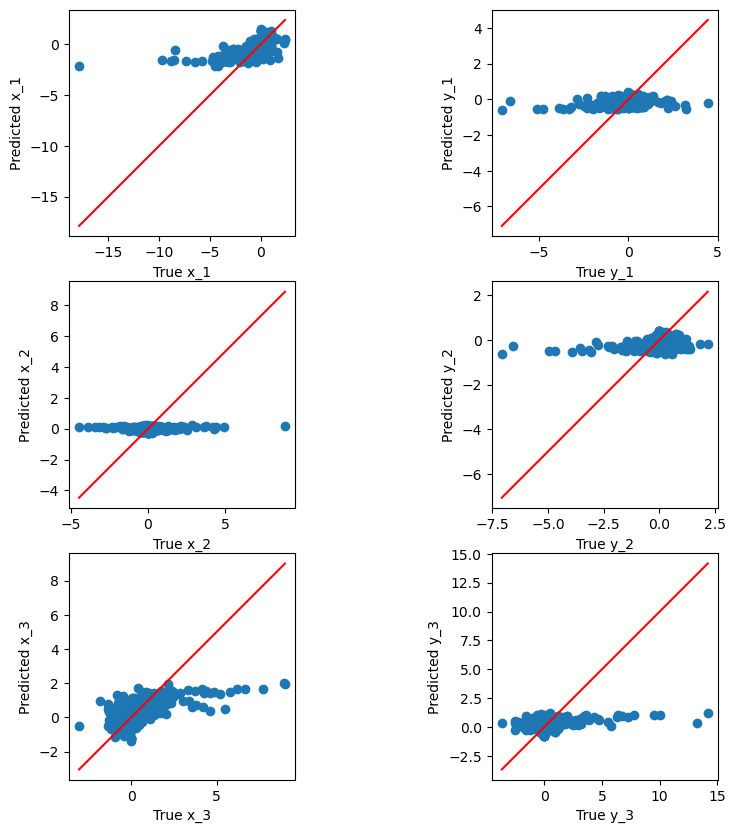

In [21]:
plot_y_yhat(y_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy())

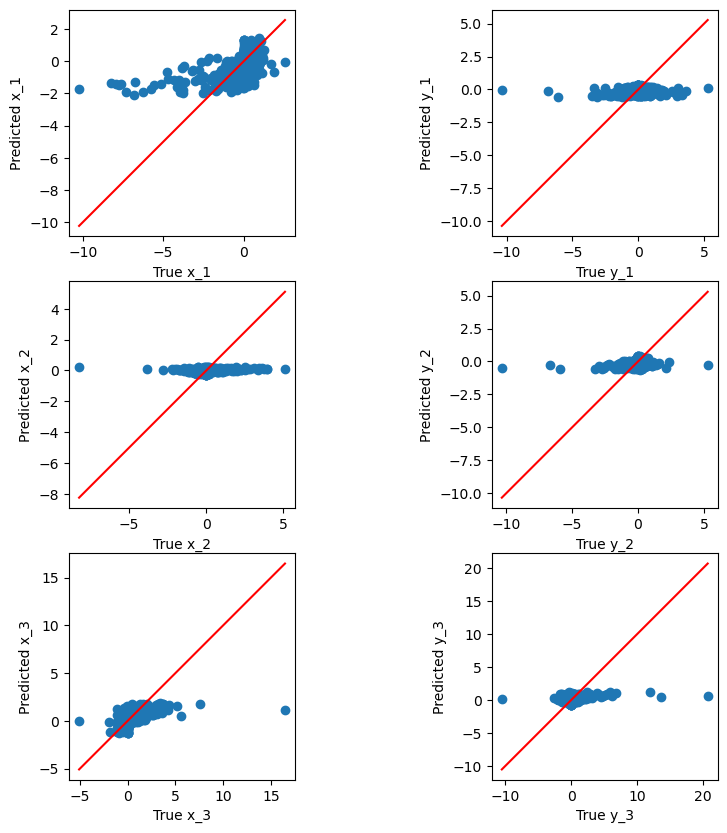

In [22]:
plot_y_yhat(y_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy())

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [24]:
pipe2= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=3)),
            ('model', Ridge())
    ])

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV

kfold2 = GroupKFold(n_splits=10)

pipe2= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=2)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

for fold_num, (train_index, validation_index) in enumerate(kfold2.split(input_train, output_train, groups=groups)):
    # Indexing with iloc
    X_train, X_validation = input_train.iloc[train_index], input_train.iloc[validation_index]
    y_train, y_validation = output_train.iloc[train_index], output_train.iloc[validation_index]


    pipe2.fit(X_train, y_train)

    n_features = pipe2.named_steps['preprocessor'].n_output_features_
    print(n_features)

    y_train_predict = pipe2.predict(X_train)
    y_val_predict = pipe2.predict(X_validation)


    train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
    print("Train MSE:", train_error)

    val_error = np.sqrt(mean_squared_error(y_validation, y_val_predict))
    print("Test MSE:", val_error)

36
Train MSE: 1.2820828974967307
Test MSE: 1.1146594490665405
36
Train MSE: 1.2704791719735837
Test MSE: 1.2282693446991575
36
Train MSE: 1.2649694794777906
Test MSE: 1.27836050958485
36
Train MSE: 1.2698781891455089
Test MSE: 1.2339978785451793
36
Train MSE: 1.2755660868278926
Test MSE: 1.1796863960496657
36
Train MSE: 1.252916288458003
Test MSE: 1.3813179070995474
36
Train MSE: 1.2253204370646649
Test MSE: 1.5892469182274234


KeyboardInterrupt: 

In [ ]:
kfold3 = GroupKFold(n_splits=10)

pipe3= Pipeline(
        [       ('preprocessor', PolynomialFeatures(degree=3)),
                ('model', Ridge())
        ])

for fold_num, (train_index, validation_index) in enumerate(kfold3.split(input_train, output_train, groups=groups)):
    # Indexing with iloc
    X_train, X_validation = input_train.iloc[train_index], input_train.iloc[validation_index]
    y_train, y_validation = output_train.iloc[train_index], output_train.iloc[validation_index]


    pipe3.fit(X_train, y_train)

    n_features = pipe3.named_steps['preprocessor'].n_output_features_
    print(n_features)

    y_train_predict = pipe3.predict(X_train)
    y_val_predict = pipe3.predict(X_validation)


    train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
    print("Train MSE:", train_error)

    val_error = np.sqrt(mean_squared_error(y_validation, y_val_predict))
    print("Test MSE:", val_error)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1,15), max_features=None):
    
    best_rsme = 1000
    best_degree = 0
    train_scores = []
    validation_scores = []
    n_features_list = []

    for d in degrees:

        pipe_d_degree= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=d)),
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    ])

        pipe_d_degree.fit(X_train, y_train)

        n_features = pipe_d_degree.named_steps['preprocessor'].n_output_features_
        n_features_list.append(n_features)

        y_train_predict = pipe_d_degree.predict(X_train)
        y_val_predict = pipe_d_degree.predict(X_val)

        #print("Degree:", d) 

        train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
        #print("Train MSE:", train_error)

        val_error = np.sqrt(mean_squared_error(y_val, y_val_predict))
        #print("Test MSE:", test_error)

        if val_error < best_rsme:
            best_rsme = val_error
            best_degree = d

        train_scores.append(train_error)
        validation_scores.append(val_error)
    
    return train_scores, validation_scores, best_rsme, best_degree, n_features_list

In [ ]:
from sklearn.model_selection import train_test_split

kfold = GroupKFold(n_splits=5)

degrees=range(1,15)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

input_train=input_train[0:6425]
output_train=output_train[0:6425]
groups=groups[0:6425]


for fold_num, (train_index, validation_index) in enumerate(kfold.split(input_train, output_train, groups=groups)):
    # Indexing with iloc
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]

    # Validate polynomial regression for each fold
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(X_train, y_train, X_validation, y_validation)
    
    best_rsmes.append(best_rsme)
    best_degrees.append(best_degree)

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])


In [ ]:
print("Best RSME: ", best_rsmes, 
        "\nBest degree: ", best_degrees, 
        "\nDegree scores: ", degree_scores, 
        "\nFeatures outputed" , n_features_list)